# causal-learn使用样例

Author: Fengzhi Li

Date: 12/11/2021

Email: lifengzhi16@mails.ucas.ac.cn

### 配置基础环境 并 下载数据集

In [1]:
# For Colab
!pip install causal-learn
!git clone https://github.com/cmu-phil/causal-learn
!cp ./causal-learn/tests/data_discrete_10.txt ./
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

fatal: destination path 'causal-learn' already exists and is not an empty directory.
--2021-12-11 05:10:37--  http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19889 (19K) [application/x-httpd-php]
Saving to: ‘breast-cancer-wisconsin.data.3’

breast-cancer-wisco 100%[===================>]  19.42K  --.-KB/s    in 0.06s   

2021-12-11 05:10:37 (307 KB/s) - ‘breast-cancer-wisconsin.data.3’ saved [19889/19889]



## 来自causal-learn提供的简单样例

[Github 开源地址](https://github.com/cmu-phil/causal-learn/)

In [2]:
import numpy as np
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import fisherz, chisq, gsq, mv_fisherz, kci 

读取数据集 并 调用PC算法

In [3]:
example_data = np.loadtxt("data_discrete_10.txt", skiprows=1)
example_result = pc(example_data, 0.05, gsq, True, 0, -1)

0 ind 1 | () with p-value 0.420998

0 dep 2 | () with p-value 0.000000

0 dep 3 | () with p-value 0.017740

0 ind 4 | () with p-value 0.243341

0 dep 5 | () with p-value 0.007380

0 dep 6 | () with p-value 0.033490

0 dep 7 | () with p-value 0.000000

0 dep 8 | () with p-value 0.000000

0 ind 9 | () with p-value 0.142335

0 ind 10 | () with p-value 0.308398

0 ind 11 | () with p-value 0.549553

0 dep 12 | () with p-value 0.000000

0 ind 13 | () with p-value 0.577992

0 ind 14 | () with p-value 0.376908

0 ind 15 | () with p-value 0.117392

0 ind 16 | () with p-value 0.056527

0 ind 17 | () with p-value 0.242781

0 ind 18 | () with p-value 0.858010

0 ind 19 | () with p-value 0.072992

1 ind 0 | () with p-value 0.420998

1 dep 2 | () with p-value 0.000000

1 ind 3 | () with p-value 0.864091

1 ind 4 | () with p-value 0.237931

1 dep 5 | () with p-value 0.010642

1 ind 6 | () with p-value 0.499247

1 ind 7 | () with p-value 0.989003

1 dep 8 | () with p-value 0.011041

1 ind 9 | () with 

输出因果图

Green: undirected; Blue: directed; Red: bi-directed



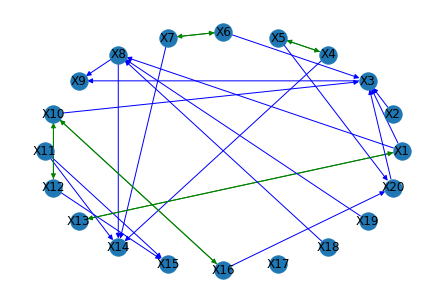

In [4]:
example_result.to_nx_graph()
example_result.draw_nx_graph(skel=False)

## 处理乳腺癌数据集

### 读取数据

使用Pandas读取数据

In [5]:
import pandas as pd
df = pd.read_table('breast-cancer-wisconsin.data', sep=',', header=None)
columns = [
    'Sample code number', #样本编码
    'Clump Thickness', #块丛厚度，1-10
    'Uniformity of Cell Size', #细胞大小的均匀性，1-10
    'Uniformity of Cell Shape', #细胞形状的均匀性，1-10
    'Marginal Adhesion', #边缘附着力，1-10
    'Single Epithelial Cell Size', #单上皮细胞大小，1-10
    'Bare Nuclei', #裸核，1-10
    'Bland Chromatin', #染色质，1-10
    'Normal Nucleoli', #正常核仁，1-10
    'Mitoses', #有丝分裂，1-10
    'Class' #类，2表示良性,4表示恶性
]
df.columns = columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


查看数据格式

In [6]:
print(df[20:25])
print(df[20:25]['Bare Nuclei'])

    Sample code number  Clump Thickness  ...  Mitoses  Class
20             1054590                7  ...        4      4
21             1054593               10  ...        1      4
22             1056784                3  ...        1      2
23             1057013                8  ...        1      4
24             1059552                1  ...        1      2

[5 rows x 11 columns]
20    10
21     7
22     1
23     ?
24     1
Name: Bare Nuclei, dtype: object


### 包含缺失数据的处理方法

标记缺失数据 并 转换为np.ndarray

In [7]:
df1 = df.copy(deep=True)
df1.replace('?', np.nan, inplace=True)
df1['Bare Nuclei'] = df1['Bare Nuclei'].astype(float) #必须使用float，因为np.nan无效值是在float下定义的
print(df1.dtypes)
data1 = df1.to_numpy()
print(data1[20:25])

Sample code number               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object
[[1.054590e+06 7.000000e+00 3.000000e+00 2.000000e+00 1.000000e+01
  5.000000e+00 1.000000e+01 5.000000e+00 4.000000e+00 4.000000e+00
  4.000000e+00]
 [1.054593e+06 1.000000e+01 5.000000e+00 5.000000e+00 3.000000e+00
  6.000000e+00 7.000000e+00 7.000000e+00 1.000000e+01 1.000000e+00
  4.000000e+00]
 [1.056784e+06 3.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  2.000000e+00 1.000000e+00 2.000000e+00 1.000000e+00 1.000000e+00
  2.000000e+00]
 [1.057013e+06 8.000000e+00 4.000000e+00 5.000000e+00 1.000000e+00
  2.000000e+00          nan 7.000000e+00

使用可处理缺失数据的PC算法

In [8]:
cancer_mvpc = pc(
    data=data1, 
    alpha=0.05,
    indep_test=mv_fisherz,
    stable=True,
    uc_rule=0,
    uc_priority=1,
    mvpc=True,
    background_knowledge=None 
)

Streaming output truncated to the last 5000 lines.
2 dep 5 | (4, 9) with p-value 0.000000

2 dep 5 | (4, 10) with p-value 0.000000

2 dep 5 | (7, 8) with p-value 0.000000

2 dep 5 | (7, 9) with p-value 0.000000

2 dep 5 | (7, 10) with p-value 0.000000

2 dep 5 | (8, 9) with p-value 0.000000

2 dep 5 | (8, 10) with p-value 0.000000

2 dep 5 | (9, 10) with p-value 0.000000

2 dep 7 | (1, 3) with p-value 0.000000

2 dep 7 | (1, 4) with p-value 0.000000

2 dep 7 | (1, 5) with p-value 0.000000

2 dep 7 | (1, 8) with p-value 0.000000

2 dep 7 | (1, 9) with p-value 0.000000

2 dep 7 | (1, 10) with p-value 0.000000

2 dep 7 | (3, 4) with p-value 0.000000

2 dep 7 | (3, 5) with p-value 0.000000

2 dep 7 | (3, 8) with p-value 0.000000

2 dep 7 | (3, 9) with p-value 0.000000

2 dep 7 | (3, 10) with p-value 0.000000

2 dep 7 | (4, 5) with p-value 0.000000

2 dep 7 | (4, 8) with p-value 0.000000

2 dep 7 | (4, 9) with p-value 0.000000

2 dep 7 | (4, 10) with p-value 0.000000

2 dep 7 | (5, 8) with 

展示因果图

Green: undirected; Blue: directed; Red: bi-directed



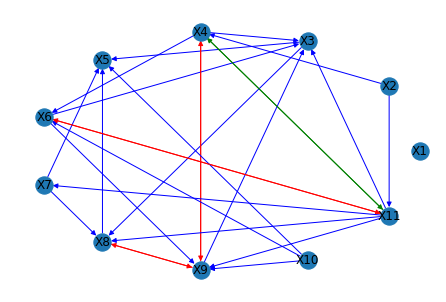

In [9]:
cancer_mvpc.to_nx_graph()
cancer_mvpc.draw_nx_graph(skel=False)

加入标签

Green: undirected; Blue: directed; Red: bi-directed



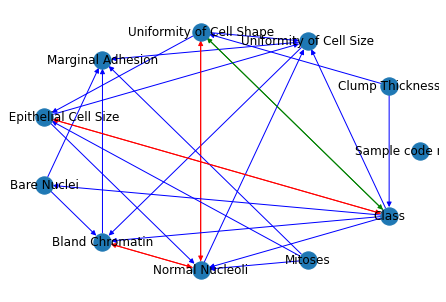

In [10]:
labels = {
    0: 'Sample code number',
    1: 'Clump Thickness',
    2: 'Uniformity of Cell Size',
    3: 'Uniformity of Cell Shape',
    4: 'Marginal Adhesion',
    5: 'Single Epithelial Cell Size',
    6: 'Bare Nuclei',
    7: 'Bland Chromatin',
    8: 'Normal Nucleoli',
    9: 'Mitoses',
    10: 'Class'
}
cancer_mvpc.labels = labels
cancer_mvpc.draw_nx_graph(skel=False)

### 不包含缺失数据的处理方法

删除缺失数据 并 转换为np.ndarray

In [11]:
df2 = df.copy(deep=True)
print(df2['Bare Nuclei'][20:26])
df2 = df2[~df2['Bare Nuclei'].str.contains('\?') ]
df2['Bare Nuclei'] = df2['Bare Nuclei'].astype(int)
print(df2['Bare Nuclei'][20:25])
df2.info()
data2 = df2.to_numpy()
print(data2[20:25])

20    10
21     7
22     1
23     ?
24     1
25     7
Name: Bare Nuclei, dtype: object
20    10
21     7
22     1
24     1
25     7
Name: Bare Nuclei, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dty

使用PC算法

In [12]:
cancer_pc = pc(
    data=data2, 
    alpha=0.01,#将显著性要求从95%提升至99%
    indep_test=fisherz,
    stable=True,
    uc_rule=0,
    uc_priority=1,
    mvpc=False,
    background_knowledge=None 
)

0 ind 1 | () with p-value 0.070649

0 ind 2 | () with p-value 0.140050

0 ind 3 | () with p-value 0.135307

0 ind 4 | () with p-value 0.034481

0 ind 5 | () with p-value 0.102135

0 dep 6 | () with p-value 0.004707

0 ind 7 | () with p-value 0.052836

0 ind 8 | () with p-value 0.092886

0 ind 9 | () with p-value 0.160922

0 ind 10 | () with p-value 0.013413

1 ind 0 | () with p-value 0.070649

1 dep 2 | () with p-value 0.000000

1 dep 3 | () with p-value 0.000000

1 dep 4 | () with p-value 0.000000

1 dep 5 | () with p-value 0.000000

1 dep 6 | () with p-value 0.000000

1 dep 7 | () with p-value 0.000000

1 dep 8 | () with p-value 0.000000

1 dep 9 | () with p-value 0.000000

1 dep 10 | () with p-value 0.000000

2 ind 0 | () with p-value 0.140050

2 dep 1 | () with p-value 0.000000

2 dep 3 | () with p-value 0.000000

2 dep 4 | () with p-value 0.000000

2 dep 5 | () with p-value 0.000000

2 dep 6 | () with p-value 0.000000

2 dep 7 | () with p-value 0.000000

2 dep 8 | () with p-value 

展示因果图

Green: undirected; Blue: directed; Red: bi-directed



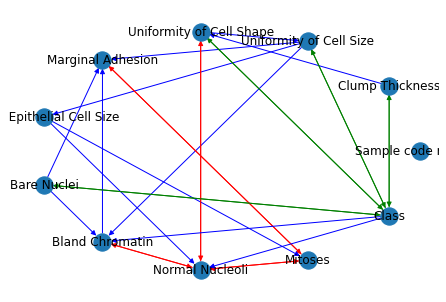

In [13]:
cancer_pc.to_nx_graph()
cancer_pc.labels = labels
cancer_pc.draw_nx_graph(skel=False)

### 加入背景知识的处理方法

编码背景知识

In [14]:
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge
nodes = cancer_pc.G.get_nodes() # 需要先用PC算法处理一次，获得结点列表
# 必须要有连边才有效
# Class -X-> Clump Thickness
# Class -X-> Uniformity of Cell Size
# Uniformity of Cell Shape ---> Normal Nucleoli
bk = BackgroundKnowledge()\
    .add_forbidden_by_node(nodes[10], nodes[1])\
    .add_forbidden_by_node(nodes[10], nodes[2])\
    .add_required_by_node(nodes[3], nodes[8]) 
cancer_bkpc = pc(data2, 0.01, fisherz, True, 0, 0, background_knowledge=bk)

0 ind 1 | () with p-value 0.070649

0 ind 2 | () with p-value 0.140050

0 ind 3 | () with p-value 0.135307

0 ind 4 | () with p-value 0.034481

0 ind 5 | () with p-value 0.102135

0 dep 6 | () with p-value 0.004707

0 ind 7 | () with p-value 0.052836

0 ind 8 | () with p-value 0.092886

0 ind 9 | () with p-value 0.160922

0 ind 10 | () with p-value 0.013413

1 ind 0 | () with p-value 0.070649

1 dep 2 | () with p-value 0.000000

1 dep 3 | () with p-value 0.000000

1 dep 4 | () with p-value 0.000000

1 dep 5 | () with p-value 0.000000

1 dep 6 | () with p-value 0.000000

1 dep 7 | () with p-value 0.000000

1 dep 8 | () with p-value 0.000000

1 dep 9 | () with p-value 0.000000

1 dep 10 | () with p-value 0.000000

2 ind 0 | () with p-value 0.140050

2 dep 1 | () with p-value 0.000000

2 dep 3 | () with p-value 0.000000

2 dep 4 | () with p-value 0.000000

2 dep 5 | () with p-value 0.000000

2 dep 6 | () with p-value 0.000000

2 dep 7 | () with p-value 0.000000

2 dep 8 | () with p-value 

展示因果图

Green: undirected; Blue: directed; Red: bi-directed



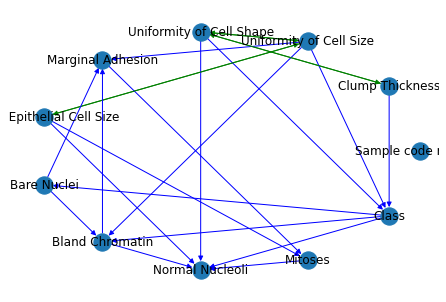

Green: undirected; Blue: directed; Red: bi-directed



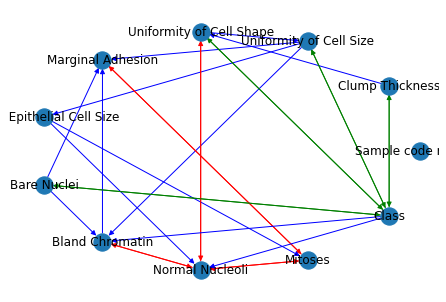

In [15]:
cancer_bkpc.to_nx_graph()
cancer_bkpc.labels = labels
cancer_bkpc.draw_nx_graph(skel=False)
cancer_pc.draw_nx_graph(skel=False)

### 使用FCI方法

In [16]:
from causallearn.search.ConstraintBased.FCI import fci
cancer_fci = fci(data2, fisherz, 0.01, verbose=True)

phase1 remove X1 --- X2 by sepset () pval:0.07064857428422178
phase1 remove X1 --- X3 by sepset () pval:0.14005013701236568
phase1 remove X1 --- X4 by sepset () pval:0.13530696041504298
phase1 remove X1 --- X5 by sepset () pval:0.03448062826841236
phase1 remove X1 --- X6 by sepset () pval:0.10213518058402893
phase1 remove X1 --- X8 by sepset () pval:0.0528357145354198
phase1 remove X1 --- X9 by sepset () pval:0.0928856741877645
phase1 remove X1 --- X10 by sepset () pval:0.16092184401384158
phase1 remove X1 --- X11 by sepset () pval:0.013413102074037231
phase1 remove X2 --- X5 by sepset ('X3',) pval:0.052828532272763074
phase1 remove X2 --- X6 by sepset ('X3',) pval:0.020418363329849698
phase1 remove X2 --- X7 by sepset ('X11',) pval:0.37064630363537676
phase1 remove X2 --- X8 by sepset ('X11',) pval:0.25055835807011306
phase1 remove X2 --- X9 by sepset ('X11',) pval:0.13746408720942527
phase1 remove X2 --- X10 by sepset ('X3',) pval:0.017463922361320994
phase1 remove X3 --- X7 by sepse

输出因果图

In [17]:
!apt-get install graphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


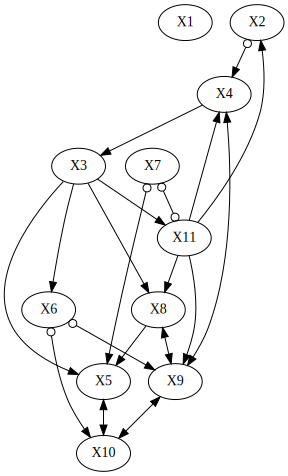

In [18]:
from causallearn.utils.GraphUtils import GraphUtils
import graphviz
pgv_g = GraphUtils.to_pgv(cancer_fci[0])
graphviz.Source(pgv_g)